In [28]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

# CIFAR-10 데이터 세트 불러오기

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

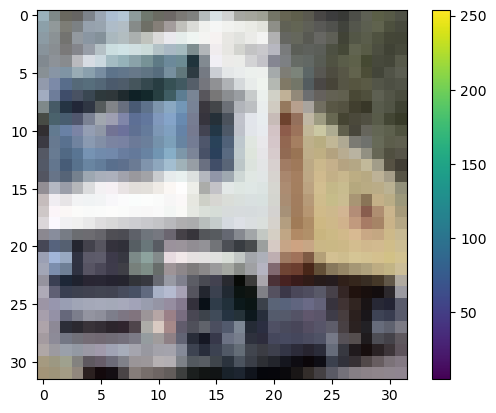

In [29]:
# 두 번째 영상(트럭)을 화면에 표시
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

X_train = X_train/255.0
X_test = X_test/255.0

In [30]:
# Sequential model 생성

model = Sequential()
model.add(Conv2D(64, activation='relu', kernel_size=(3,3 )))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, activation='relu', kernel_size=(3,3 )))
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(80, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [35]:
# model compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model fit
history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.3)

Epoch 1/10
1094/1094 [==============================] - 9s 7ms/step - loss: 0.1348 - accuracy: 0.9521 - val_loss: 2.6192 - val_accuracy: 0.6173
Epoch 2/10
1094/1094 [==============================] - 8s 7ms/step - loss: 0.1051 - accuracy: 0.9636 - val_loss: 2.9066 - val_accuracy: 0.6129
Epoch 3/10
1094/1094 [==============================] - 8s 7ms/step - loss: 0.1098 - accuracy: 0.9614 - val_loss: 2.7908 - val_accuracy: 0.6158
Epoch 4/10
1094/1094 [==============================] - 8s 7ms/step - loss: 0.0937 - accuracy: 0.9678 - val_loss: 2.9466 - val_accuracy: 0.6110
Epoch 5/10
1094/1094 [==============================] - 8s 7ms/step - loss: 0.0987 - accuracy: 0.9657 - val_loss: 3.0225 - val_accuracy: 0.6089
Epoch 6/10
1094/1094 [==============================] - 8s 7ms/step - loss: 0.0804 - accuracy: 0.9723 - val_loss: 3.2560 - val_accuracy: 0.6012
Epoch 7/10
1094/1094 [==============================] - 8s 7ms/step - loss: 0.0989 - accuracy: 0.9653 - val_loss: 3.0934 - val_accuracy:

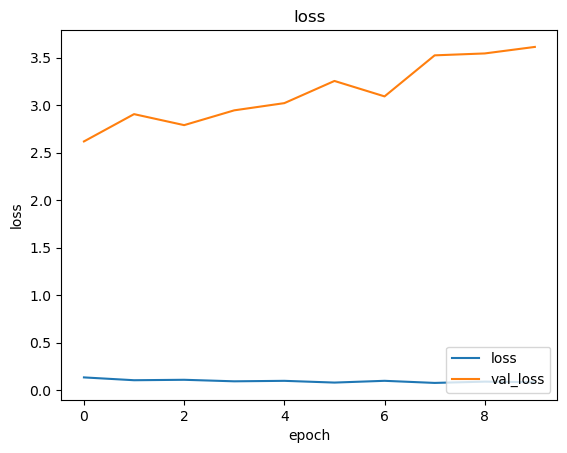

In [40]:
# 손실값 그래프로 나타내기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='lower right')
plt.show()

313/313 [==============================] - 1s 2ms/step
정답= [8]
예측값= [1.39687047e-03 1.20366307e-03 5.14572037e-07 2.17663384e-07
 9.39353484e-09 1.20234256e-09 1.02090147e-09 1.00100976e-10
 9.97275889e-01 1.22909187e-04]


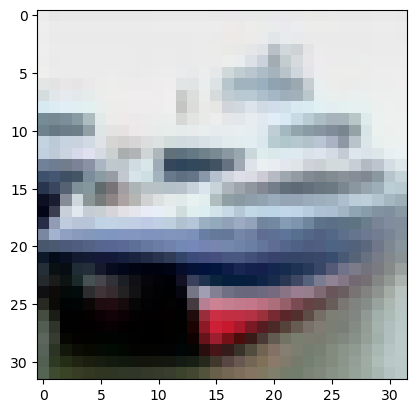

In [33]:
plt.figure()
plt.imshow(X_test[1])
y_pred = model.predict(X_test)
print("정답=", y_test[1])
print("예측값=", y_pred[1])